In [1]:
from numpy import load
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load("power_consumption.npz")

In [3]:
lst = data.files

In [4]:
for item in lst:
    print(item)
    print(data[item])

arr_0
[ 0.00387928  0.05724333 -0.01318807 ...  0.03482605  0.02234627
  0.09343685]


In [5]:
real_data = data[lst[0]]

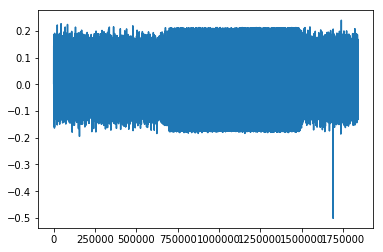

In [6]:
plt.plot(real_data)

In [7]:
len(real_data)

1842128

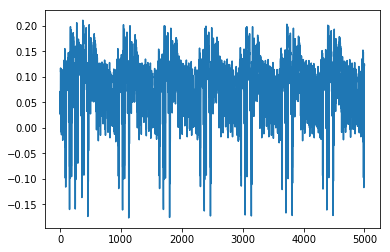

In [8]:
#plt.figure(figsize=(20,10))
plt.plot(real_data[700000:705000])

#### Tous les patterns ne font pas exactement 700 points. il va falloir faire glisser une fenêtre virtuelle et compter le nombre de pics qui dépassent le seuil.

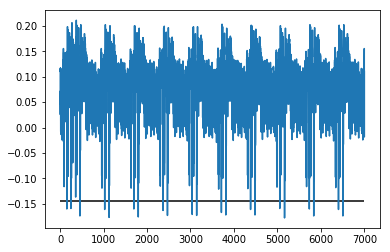

In [9]:
#plt.figure(figsize=(20,10))
xrange=700
xstart=700000
pattern_number=10
plt.plot(real_data[xstart:xstart+xrange*pattern_number])
plt.hlines(y=-0.144, xmin=0, xmax=xrange*pattern_number)

In [10]:
new_data = real_data[700000-1000:1489000+1000]

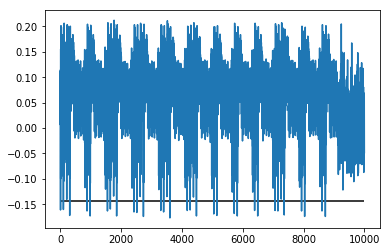

In [11]:
#plt.figure(figsize=(20,10))
plt.plot(new_data[-10000:])
plt.hlines(y=-0.144, xmin=0, xmax=10000)

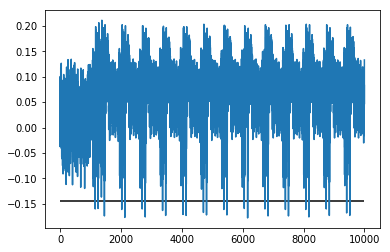

In [12]:
#plt.figure(figsize=(20,10))
plt.plot(new_data[:10000])
plt.hlines(y=-0.144, xmin=0, xmax=10000)

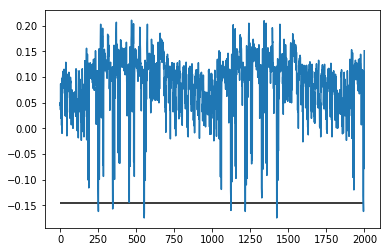

In [13]:
#plt.figure(figsize=(20,10))
plt.plot(new_data[14000:16000])
plt.hlines(y=-0.145, xmin=0, xmax=2000)

#### Faisons simple: trouvons le premier pic, et gardons une trace de tous les offsets de tous les pics.
#### Ensuite, il suffit de faire une liste où chaque élément représente un groupe de 2 ou 3 pics.

In [14]:
THRESHOLD = -0.145

In [15]:
#d'abord, trouvons le premier pic.
first_peak = 0
for i in range(len(new_data)):
    if new_data[i] <= THRESHOLD:
        first_peak = i
        print(first_peak)
        break

1156


In [16]:
idx = first_peak
l2 = []
WINDOW = 500
SLIDE = 600

debug_bits_counter = 0
#tant qu'on n'a pas regardé toute la courbe
while ((idx < len(new_data)) and (idx + WINDOW < len(new_data))): 
    if debug_bits_counter == 1024:
        print(idx)
    sum = 0
    idx_window = idx
    while (idx_window < idx + WINDOW):
        if (new_data[idx_window] <= THRESHOLD):
            sum += 1
            idx_window += 5 #pour éviter de compter un pic plusieurs fois
        else:
            idx_window+=1
    if sum == 2: #petit pattern détecté
        l2.append(0)
    elif sum >= 3: #gros pattern détecté
        l2.append(1)
    else:
        break
    idx += SLIDE
    #ajustement sur le pic suivant
    #si on a atteint la fin, alors quitter
    if (idx + WINDOW > len(new_data)):
        break
    for i in range(idx, idx+WINDOW):
        if new_data[i] <= THRESHOLD:
            idx = i
            break
    debug_bits_counter += 1

790206


In [17]:
len(l2)

1024

In [18]:
binary_str = "".join(str(l) for l in l2)
RSA_key = hex(int(binary_str,2))

In [19]:
binary_str

'100000000000011011110010010000011010001001111111101011100110100101110101110010100100001101111101010000010111100111100100011000000000101000101011001101001110110111010100011100110100010101011001010000110101010010101101100011100010011000011111011011100100101100011011010001111010011011101001100000011001010000110001011100001110101001010000000010001100100100000010100010110011111011011011110101000010011110111110111100000010110111010011100110100010011111111111000000110100111110111011100001101011101010000010010000001001011111000100111101011011010111100010100100010011001011100111100100000011011010000100000011100010011100110001011000110111100010000011000001011100101000101011001011110000111100111001101011001001111100011011010010000001100100010110111101010010101011110001110010001100011101100111101010010011101011000010001011101101101100010101000011000111101101101111011000011101010101001010101011111010011011100011000010011000001000011100001111001110010001100111110101011010100111011101111010011111101

In [20]:
RSA_key

'0x8006f241a27fae6975ca437d4179e4600a2b34edd47345594354ad8e261f6e4b1b47a6e981943170ea5008c9028b3edbd427bef02dd39a27ff034fbb86ba824097c4f5b5e29132e79036840e273163788305ca2b2f0f39ac9f1b481916f52af1c8c767a93ac22edb150c7b6f61d54aafa6e309821c3ce467d5a9dde9fb3e1bc4'

#### inversion de la clé

In [21]:
inv_binary_str = binary_str[::-1]
final_RSA_key = hex(int(inv_binary_str, 2))
final_RSA_key

'0x23d87cdf97bb95abe6273c384190c765f552ab86f6de30a8db74435c95e6e3138f54af689812d8f9359cf0f4d453a0c11ec68ce470216c09e74c8947adaf23e902415d61ddf2c0ffe459cbb40f7de42bdb7cd14093100a570e8c29819765e2d8d276f86471b52ac29aa2ce2bb72cd45006279e82bec253ae9675fe45824f6001'